In [1]:
import pandas

In [3]:
clean_dataset = pandas.read_csv('df_banco_final.csv', sep=';')
clean_dataset.head()

,default,account_check_status,duration_in_month,credit_history,savings,present_emp_since,installment_as_income_perc,other_debtors,property,age,...,job,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito,rango_plazos_credito_2,rango_edad_2
0,0,1,6,5,1,1,4,1,1,67,...,3,1,1,0,1,5,1,2,1,5
1,1,2,48,3,5,3,2,1,1,22,...,3,0,1,1,0,1,4,6,4,1
2,0,4,12,5,5,2,2,1,1,49,...,2,0,1,0,1,3,1,3,1,3
3,0,1,42,3,5,2,2,3,2,45,...,3,0,1,0,1,3,4,8,4,3
4,1,1,24,4,5,3,3,1,4,53,...,3,0,1,0,1,4,2,5,2,4


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
norm = StandardScaler()

In [9]:
x = clean_dataset.drop('default', axis=1)
y = clean_dataset['default']

x_normalized = norm.fit_transform(x)
x_normalized

array([[-1.06271653, -1.28600333,  1.50687935, ..., -0.62124939,
        -1.05547493,  2.80548   ],
       [-0.25059691,  2.07102202, -0.33157912, ...,  0.79816986,
         1.95811766, -0.85668504],
       [ 1.37364232, -0.80642828,  1.50687935, ..., -0.26639458,
        -1.05547493,  0.97439748],
       ...,
       [-1.06271653, -0.80642828, -2.17003758, ..., -0.62124939,
        -1.05547493, -0.85668504],
       [-0.25059691,  0.15272182, -0.33157912, ..., -0.26639458,
        -0.05094407, -0.85668504],
       [-1.06271653, -0.80642828, -0.33157912, ..., -0.62124939,
        -1.05547493, -0.85668504]])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.3, random_state=123)

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
model = RandomForestClassifier(random_state=123)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=123)

In [15]:
predictions = model.predict(x_test)

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

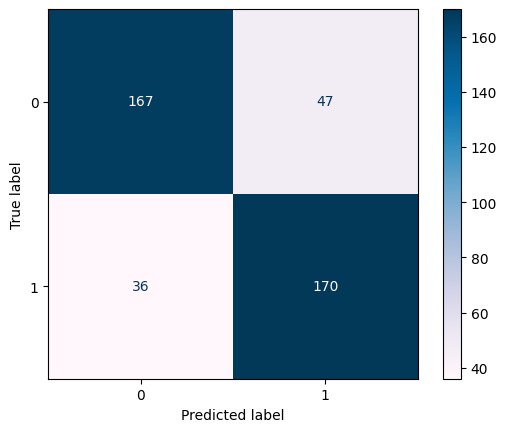

In [17]:
confmatrix = confusion_matrix(y_test, predictions)
confmatrix

visual_confmatrix = ConfusionMatrixDisplay(confmatrix)
visual_confmatrix.plot(cmap='PuBu')

In [18]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
rocauc = roc_auc_score(y_test, predictions)

In [22]:
model_scores = {
  'model': 'RandomForestClassifier',
  'accuracy': accuracy,
  'precision': precision,
  'recall': recall,
  'f1_score': f1,
  'roc_auc_score': rocauc
}
model_scores

{'model': 'RandomForestClassifier',
 'accuracy': 0.8023809523809524,
 'precision': 0.783410138248848,
 'recall': 0.8252427184466019,
 'f1_score': 0.8037825059101655,
 'roc_auc_score': 0.8028082751111515}

In [20]:
def save_scores(model_scores: dict):
  status = []
  #Utilizamos un try-except en caso de que el archivo no exista que cree uno
  try:
    #Si el archivo existe continúa por acá
    scores = pandas.read_csv('scores.csv', sep=';')
    status.append('El archivo existe')
    exist = model_scores['model'] in scores['model'].values
    #Validamos si el modelo ya existe en el archivo de scores
    if (exist):
      #Si el modelo ya existe reemplazamos sus valores
      status.append('El modelo existe')
      criteria = scores['model'] == model_scores['model']
      index = scores[criteria].index[0]
      scores.iloc[index] = model_scores
      status.append('Se reemplazaron los valores del modelo')
    else:
      #Si el modelo no existe lo agregamos
      status.append('El modelo no existe')
      df_model_scores = pandas.DataFrame(model_scores, index=[0])
      scores = pandas.concat([scores, df_model_scores], ignore_index=True)
      status.append('Se añadió modelo nuevo y sus valores')
  except:
    #Si no existe el archivo lo creamos y cargamos los scores del modelo
    status.append('El archivo no existe')
    scores = pandas.DataFrame(model_scores, index=[0])

  status.append('Se sobrescrive el archivo scores.csv con valores nuevos')
  scores.to_csv('scores.csv', sep=';', index=False)
  return status

In [23]:
save_scores(model_scores)

['El archivo existe',
 'El modelo no existe',
 'Se añadió modelo nuevo y sus valores',
 'Se sobrescrive el archivo scores.csv con valores nuevos']